# **Census Data Income Prediction**  

## **Introduction**  
Income prediction is a crucial task in various socioeconomic applications, such as policymaking, market analysis, and financial planning. In this project, we analyze the U.S. Census dataset to predict whether an individual earns more than $50K per year based on demographic and economic attributes.  

Using machine learning techniques, we train and evaluate multiple classifiers to determine the most effective model for this classification task. Additionally, we explore key factors influencing income levels and optimize model performance through cross-validation and hyperparameter tuning.  

## **Objective**  
- Predict whether an individual earns **≤50K or >50K** based on census features.  
- Compare different classification models and evaluate their performance.  
- Identify the most important features affecting income prediction.  

## **Dataset**  
The dataset is derived from the **UCI Adult Census Income** dataset, containing demographic and employment-related attributes such as:  
- **Demographic:** Age, gender, marital status, education, race.  
- **Economic:** Occupation, work class, hours per week, capital gain/loss.  

## **Approach**  
- Perform **data preprocessing** (handling missing values, encoding categorical variables, feature scaling).  
- Train and evaluate multiple **classification models**, including:  
  - Logistic Regression  
  - Support Vector Machine  
  - Gradient Boosting  
  - K-Nearest Neighbors  
  - Decision Tree  
  - Random Forest  
  - Neural Network  
- Apply **cross-validation and hyperparameter tuning** to optimize model performance.  
- Analyze **feature importance** to understand key income predictors.  

## **Technologies Used**  
- **Libraries:** Scikit-Learn, Keras, Matplotlib, Plotly, XGBoost  
- **Techniques:** Data preprocessing, classification models, cross-validation, hyperparameter tuning  

# Imports

Next step is to import some essential libraries as well as the dataset itself. We drop the "education.num" column as it is the same as the "education" column but is categorically labaled.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/adult.csv')
df = df.drop(['education.num'],axis=1)

## Data Preprocessing

We take a quick look at the dataset by describing both the numerical and categorical variables

In [3]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

The code below outputs a summary of the categorical features in the dataset, including the following information for each feature:

- **Count**: The total number of entries for that feature (in this case, 32,561 for each).
- **Unique**: The number of unique categories or values in that feature.
- **Top**: The most frequent category or value in that feature.
- **Freq**: The frequency (number of occurrences) of the most frequent category or value.

The most important information we gained is that the dataset is inbalanced when it comes to the target variable, with the "<=50K" accounting for 24720 examples out of a total of 32561.

In [5]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


The code provides a statistical summary of the continuous features in the dataset, showing the following metrics for each feature:

- **Count**: The total number of non-null entries for that feature.
- **Mean**: The average value of the feature.
- **Std**: The standard deviation, indicating how spread out the values are.
- **Min**: The minimum value in the feature.
- **25%**: The first quartile (25th percentile), representing the value below which 25% of the data fall.
- **50%**: The median (50th percentile), representing the middle value of the data.
- **75%**: The third quartile (75th percentile), representing the value below which 75% of the data fall.
- **Max**: The maximum value in the feature.

This summary helps understand the distribution of continuous variables in the dataset, providing insights into their central tendency, spread, and potential outliers.


In [9]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
df.shape

(32561, 14)

### Removing ? values

We see that the NA values in this dataset are represented by a "?", as they only occur in the categorical variables as seen below, I decided to remove them as they are not frequent. I go with this option instead of replacing them with the mode of each feature because that affects the performance of the models negatively.

In [11]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(include='int64').columns

In [12]:
for i in cat:
    count = df[i].value_counts().get('?', 0)
    print(f'The number of occurrences of "?" in {i} is {count}')

The number of occurrences of "?" in workclass is 1836
The number of occurrences of "?" in education is 0
The number of occurrences of "?" in marital.status is 0
The number of occurrences of "?" in occupation is 1843
The number of occurrences of "?" in relationship is 0
The number of occurrences of "?" in race is 0
The number of occurrences of "?" in sex is 0
The number of occurrences of "?" in native.country is 583
The number of occurrences of "?" in income is 0


In [13]:
df[df == '?'] = np.nan


In [15]:
nan_count = df.isna().sum()

print(nan_count)

age                  0
workclass         1836
fnlwgt               0
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [16]:
print(f"Dataframe size before dropping na values: {df.shape}")
df = df.dropna()
print(f"Dataframe size after dropping na values: {df.shape}")



Dataframe size before dropping na values: (32561, 14)
Dataframe size after dropping na values: (30162, 14)


## EDA

### Exploratory Data Analysis (EDA) - Categorical Variables

For the **Exploratory Data Analysis (EDA)** of the categorical variables, we begin by analyzing the frequency of each category within the individual columns, grouped by the **income** variable (<=50K or >50K). This allows us to better understand the relationship between categorical variables and income levels.

#### Frequency of Categories:
We check how the categories within each column are distributed across the income groups. For example:
- **Sex**: We observe how many males and females fall into each income category (<=50K or >50K).
- **Race**: We examine how different racial groups are distributed between the two income categories.

#### Percentages for Deeper Insights:
To gain a more nuanced understanding of the data, we calculate the **percentage of each category within the income groups**. This step helps us understand the representation of each category within the income brackets more clearly.

#### Insights:
- **Gender (Sex)**: The analysis shows that a higher percentage of men earn more than 50K compared to women. This observation could suggest potential gender disparities in income within the dataset.
- **Race**: The categories with the highest percentage of individuals earning more than 50K are "White" and "Asian-Pac-Islander." This might indicate racial discrepancies in higher-income earning groups, which is worth investigating further.

These insights can guide us in understanding how income is distributed across different demographic groups, and can also reveal potential areas for deeper statistical analysis or bias correction in models.


In [32]:
for i in cat:
    df[i] = df[i].astype('category')

Text(0.5, 1.0, 'Workclass wrt. income')

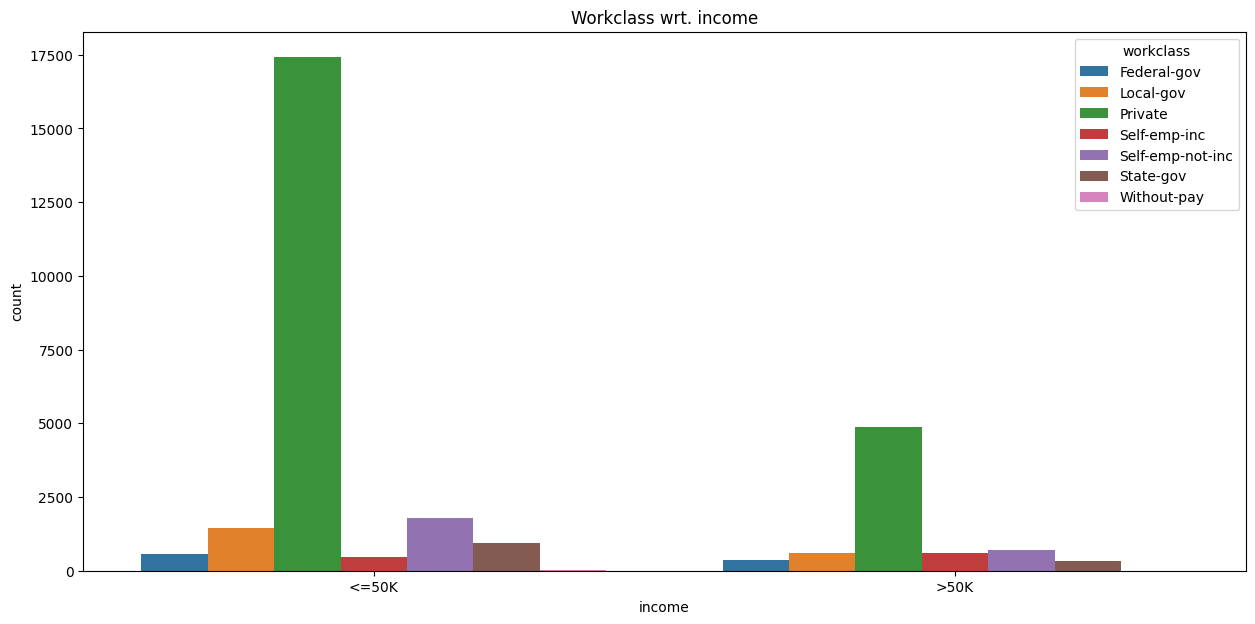

In [33]:
fig, ax = plt.subplots( figsize=(15,7))
sns.countplot(x ='income',hue ='workclass' , data = df)
plt.title('Workclass wrt. income')

Text(0.5, 1.0, 'education wrt. income')

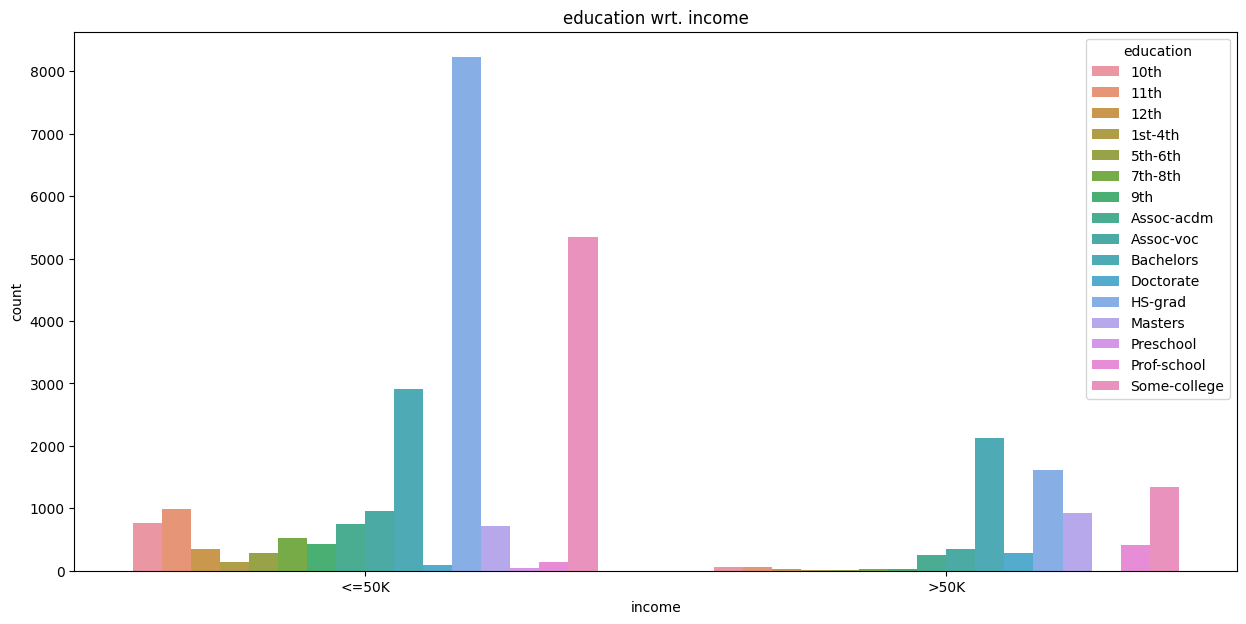

In [34]:
fig, ax = plt.subplots( figsize=(15,7))
sns.countplot(x ='income',hue ='education', data = df)
plt.title('education wrt. income')

Text(0.5, 1.0, 'marital status wrt. income')

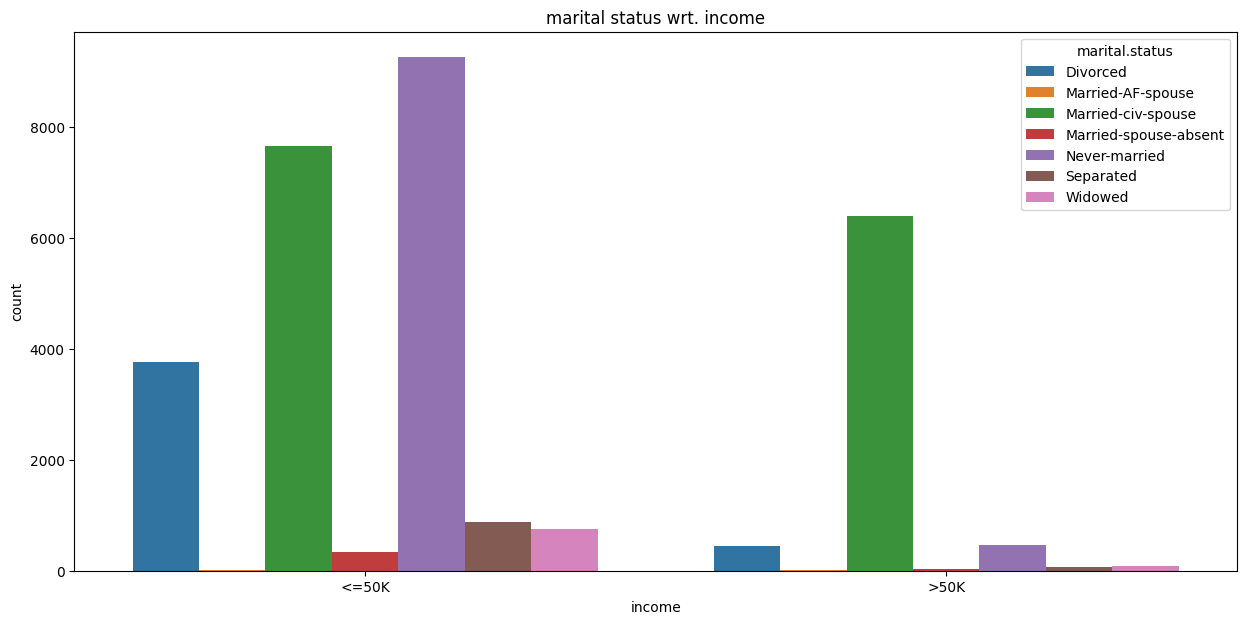

In [35]:
fig, ax = plt.subplots( figsize=(15,7))
sns.countplot(x ='income',hue ='marital.status', data = df)
plt.title('marital status wrt. income')

Text(0.5, 1.0, 'occupation wrt. income')

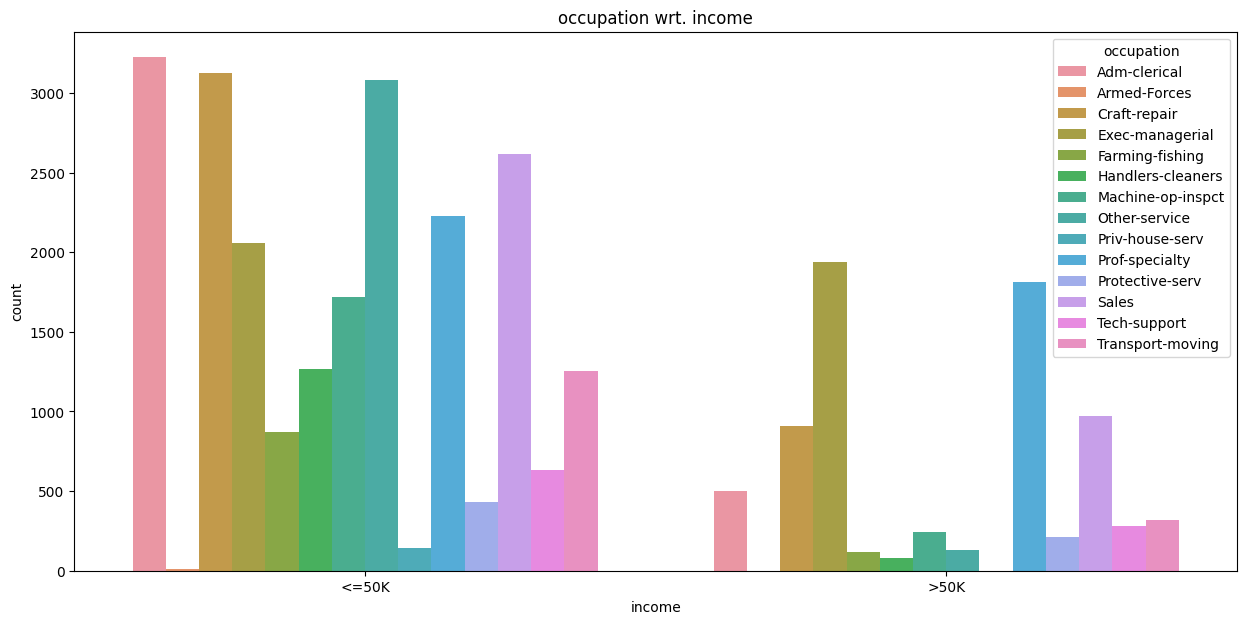

In [36]:
fig, ax = plt.subplots( figsize=(15,7))
sns.countplot(x ='income',hue ='occupation', data = df)
plt.title('occupation wrt. income')

Text(0.5, 1.0, 'relationship wrt. income')

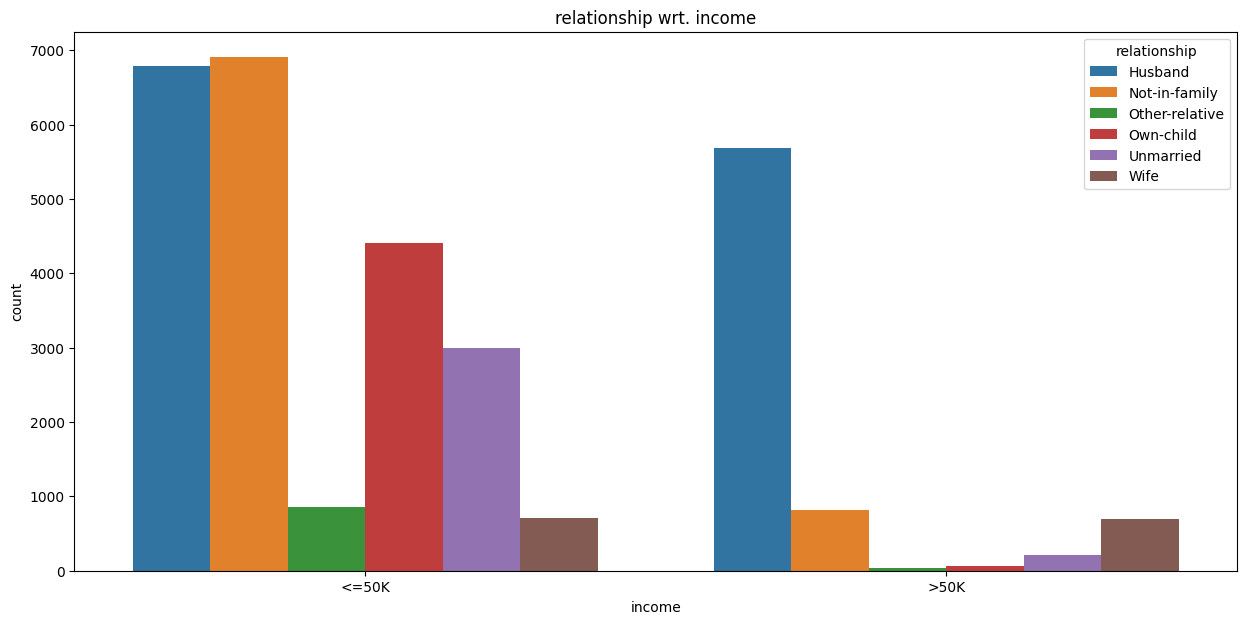

In [37]:
fig, ax = plt.subplots( figsize=(15,7))
sns.countplot(x ='income',hue ='relationship', data = df)
plt.title('relationship wrt. income')

<Axes: xlabel='income', ylabel='count'>

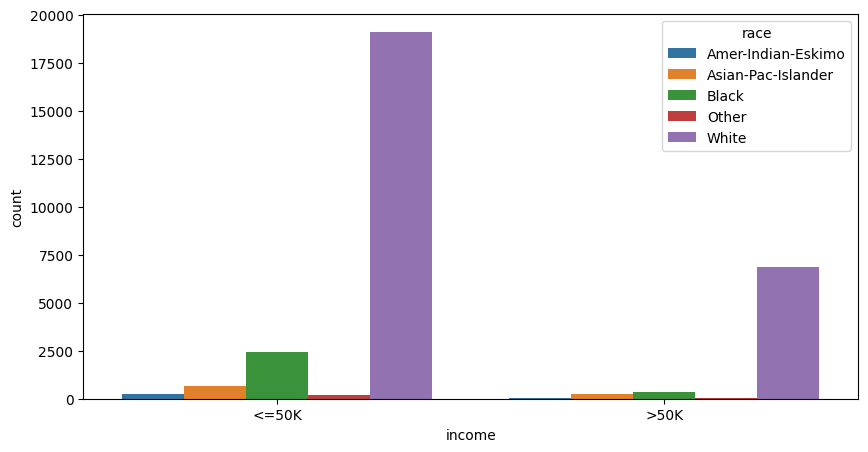

In [38]:
fig, ax = plt.subplots( figsize=(10,5))
sns.countplot(x ='income',hue ='race', data = df)


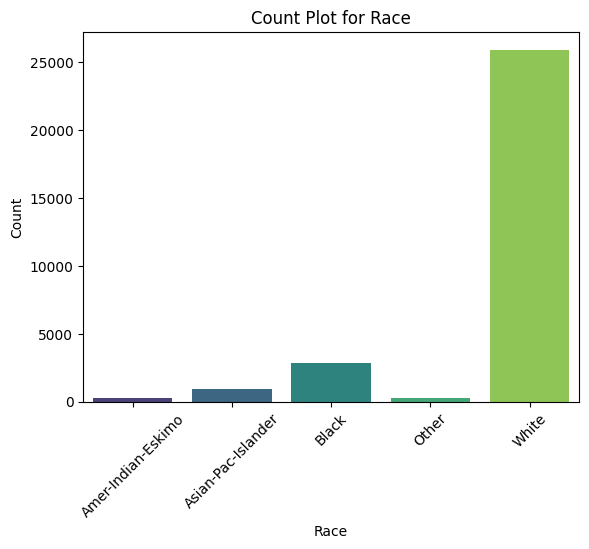

In [39]:
sns.countplot(data=df, x='race', palette='viridis')

plt.title('Count Plot for Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
grouped_race = df.groupby(['race', 'income']).size().reset_index(name='frequency')
total_race = df.groupby('race').size().reset_index(name='total')
grouped_race = pd.merge(grouped_race, total_race, on='race', how='left')
grouped_race['percentage'] = 100*grouped_race['frequency']/grouped_race['total']
grouped_race.head()

,race,income,frequency,total,percentage
0,Amer-Indian-Eskimo,<=50K,252,286,88.111888
1,Amer-Indian-Eskimo,>50K,34,286,11.888112
2,Asian-Pac-Islander,<=50K,647,895,72.290503
3,Asian-Pac-Islander,>50K,248,895,27.709497
4,Black,<=50K,2451,2817,87.007455


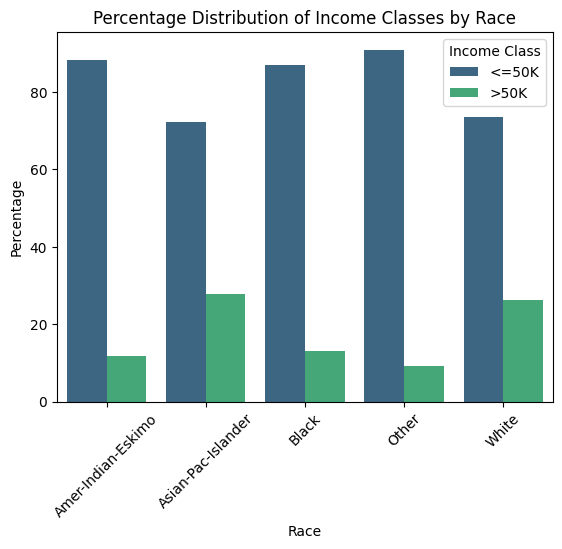

In [41]:

sns.barplot(data=grouped_race, x='race', y='percentage', hue='income', palette='viridis')

plt.title('Percentage Distribution of Income Classes by Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.legend(title='Income Class')
plt.show()

<Axes: xlabel='income', ylabel='count'>

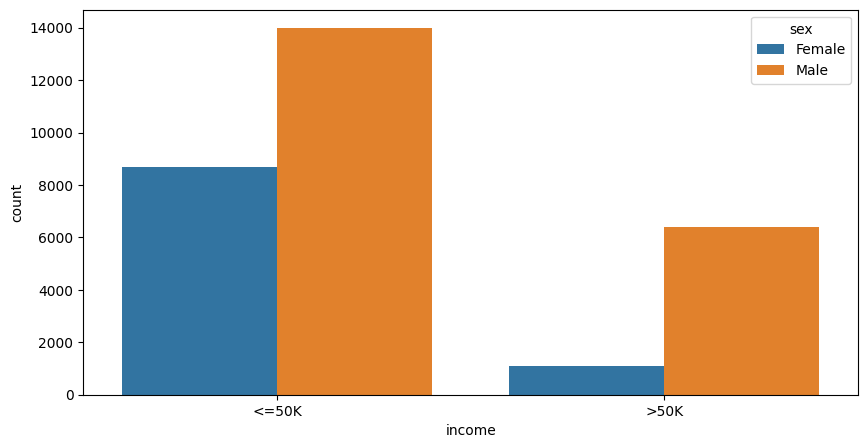

In [42]:
fig, ax = plt.subplots( figsize=(10,5))
sns.countplot(x ='income',hue ='sex', data = df)


In [43]:
grouped_data = df.groupby(['income', 'sex']).size().unstack(fill_value=0)


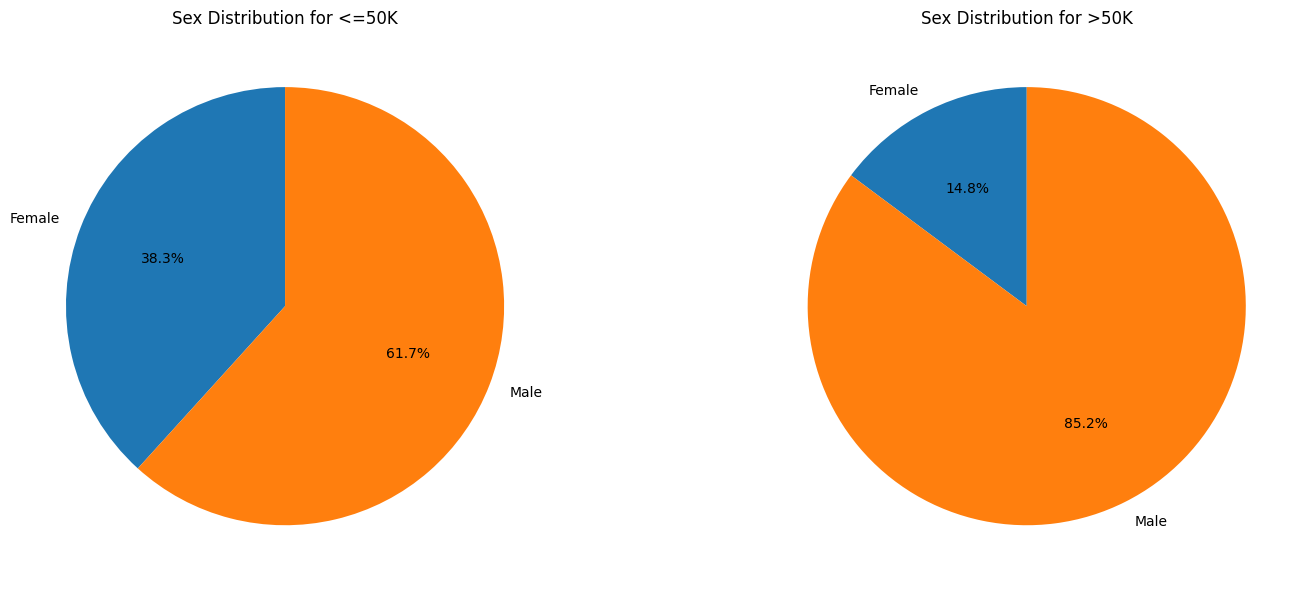

In [44]:
fig, axes = plt.subplots(1, len(grouped_data), figsize=(16, 6))

for i, (target_class, counts) in enumerate(grouped_data.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Sex Distribution for {target_class}')

plt.tight_layout()
plt.show()

In [45]:
grouped_race = df.groupby(['sex', 'income']).size().reset_index(name='frequency')
total_race = df.groupby('sex').size().reset_index(name='total')
grouped_race = pd.merge(grouped_race, total_race, on='sex', how='left')
grouped_race['percentage'] = 100*grouped_race['frequency']/grouped_race['total']
grouped_race.head()

,sex,income,frequency,total,percentage
0,Female,<=50K,8670,9782,88.632182
1,Female,>50K,1112,9782,11.367818
2,Male,<=50K,13984,20380,68.616290
3,Male,>50K,6396,20380,31.383710


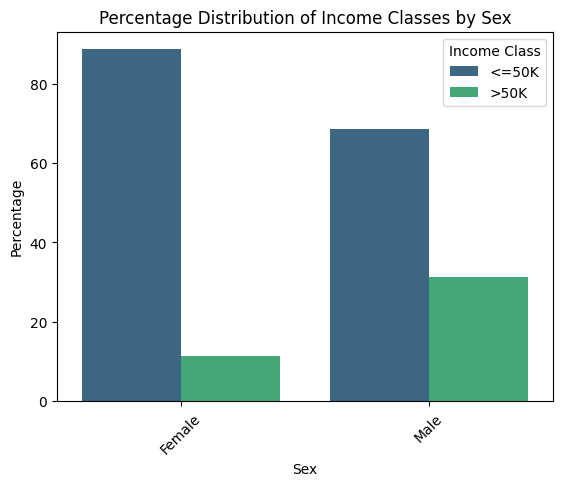

In [46]:

sns.barplot(data=grouped_race, x='sex', y='percentage', hue='income', palette='viridis')

plt.title('Percentage Distribution of Income Classes by Sex')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.xticks(rotation=45)
plt.legend(title='Income Class')
plt.show()

### Exploratory Data Analysis (EDA) - Numerical Variables

For the **Exploratory Data Analysis (EDA)** of the numerical variables, I employed two common techniques: **pairplots** and a **correlation matrix heatmap**. These methods help us visually and statistically explore the relationships between the continuous variables.

#### Pairplots:
Pairplots provide a visual representation of pairwise relationships between numerical variables. They allow us to see potential trends, clusters, or any correlations between the variables at a glance. By plotting each numerical variable against every other variable, we can spot any significant patterns or dependencies.

#### Correlation Matrix Heatmap:
The **correlation matrix heatmap** is another useful tool for assessing relationships between numerical features. It calculates the pairwise correlation coefficients between all numerical variables, helping us identify any high correlations or collinearity issues. The heatmap visually represents these correlations, where darker colors indicate stronger relationships.

#### Insights:
- **No Obvious Relationships**: As seen in the pairplot and heatmap, there are no obvious relationships or patterns between the numerical variables. The scatter plots are scattered without clear trends, and the correlation matrix shows low correlation values.
- **No Collinearity**: This is a positive outcome, as it suggests that there are no **highly correlated** numerical features in the dataset. This means the model will not suffer from multicollinearity, where redundant information from highly correlated variables could lead to instability in the results.

These findings provide confidence that the dataset is free from problematic correlations, allowing us to proceed with modeling without concerns of multicollinearity between the numerical features.


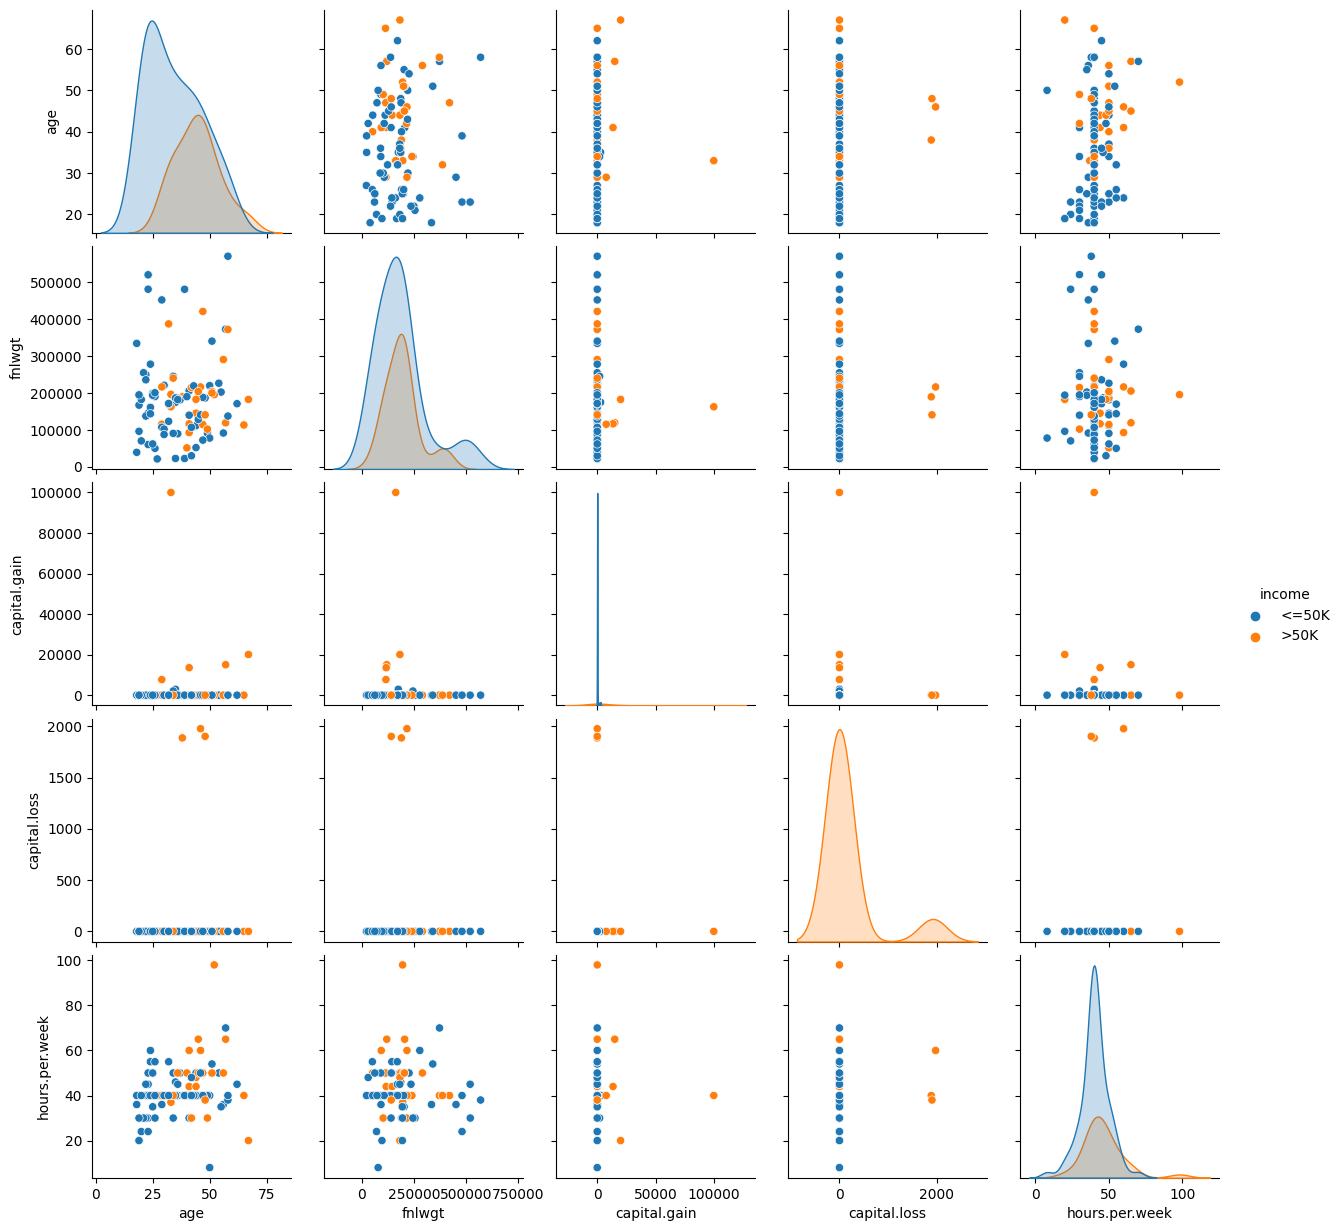

In [47]:
sns.pairplot(df.sample(100), hue='income')
plt.show()

                     age    fnlwgt  capital.gain  capital.loss  hours.per.week
age             1.000000 -0.076511      0.080154      0.060165        0.101599
fnlwgt         -0.076511  1.000000      0.000422     -0.009750       -0.022886
capital.gain    0.080154  0.000422      1.000000     -0.032229        0.080432
capital.loss    0.060165 -0.009750     -0.032229      1.000000        0.052417
hours.per.week  0.101599 -0.022886      0.080432      0.052417        1.000000


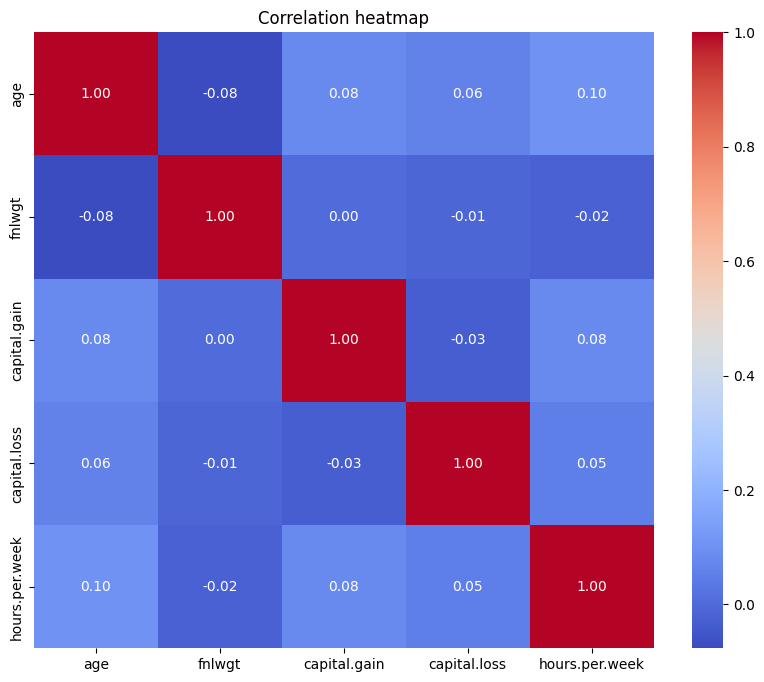

In [48]:

numeric_data = df.select_dtypes(include='int64')

cor_matrix = numeric_data.corr()

print(cor_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

## Models

Next up is training the models. The first step is to split the dataset into training and testing datasets. I will be using a 80-20 split. The split is done based on the target variable to ensure that equal examples from each class are distributed

### Data Splitting

The first step in training the models is to split the dataset into training and testing datasets. I use an **80-20 split** for this task, ensuring that 80% of the data is used for training and 20% is used for testing. The splitting process is stratified based on the `income` column to preserve the proportion of each class (e.g., <=50K and >50K) in both the training and testing datasets.

To achieve this, I loop over the unique values in the `income` column and perform the split separately for each class. This ensures that each class in the target variable is represented equally in both the training and test sets. The split is done in the following steps:

1. **Train-Test Split**: For each unique value in the `income` column, I split the dataset into 80% for training and 20% for testing using `train_test_split`.
2. **Concatenate and Shuffle**: After the split, the training and testing sets for each class are concatenated and shuffled to ensure randomness.
3. **Target and Feature Separation**: The target variable (`income`) is separated from the feature variables (`X_train` and `X_test`), and the final datasets are ready for model training and evaluation.

The code below shows the data preparation steps:

In [49]:
from sklearn.model_selection import train_test_split

unique_values = df['income'].unique().tolist()

X_train = list()
X_val = list()
X_test = list()
for cl in unique_values:
    train, test  = train_test_split(df[df.income==cl], test_size=0.2, random_state=42)
    #val, test  = train_test_split(val[val.income==cl],test_size=0.5,random_state=42)

    X_train.append(train)
    #X_val.append(val)
    X_test.append(test)
X_train = pd.concat(X_train).sample(frac=1, random_state=10)
y_train = X_train['income']
X_train = X_train.drop(columns=['income'])
X_test = pd.concat(X_test)
y_test = X_test['income']
X_test = X_test.drop(columns=['income'])
#X_val = pd.concat(X_val)
#y_val = X_val['income']
#X_val = X_val.drop(columns=['income'])
print(f"Training set size: {len(X_train)}")
#print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 24129
Test set size: 6033


### Data Preprocessing with a Pipeline

In this step, we use a **pipeline** to prepare the data for model training. The pipeline helps us handle the different types of data in the dataset (numerical and categorical) in a structured way.

1. **Categorical Data:** 
   - We apply **One-Hot Encoding** to convert categorical variables (e.g., job types, marital status) into binary columns. Each unique category is represented by a separate column, making the data suitable for machine learning models.

2. **Numerical Data:** 
   - We standardize numerical features (e.g., age, hours per week) to ensure they all have a similar scale, which helps improve model performance.

3. **Transforming the Data:** 
   - The data is transformed using the pipeline for both training and testing sets to ensure consistency.

4. **Target Variable:** 
   - The target variable (income) is encoded into numerical values (e.g., 0 for less than or equal to 50K, 1 for more than 50K) for the model to work with.

This organized approach ensures that all data is preprocessed uniformly and ready for the machine learning model.


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder




cat = df.drop(columns=['income']).select_dtypes(include='category').columns
num = df.drop(columns=['income']).select_dtypes(include='int64').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(sparse_output=False), cat)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train = pipeline.fit_transform(X_train)
#X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_train = encoder.transform(y_train)
#y_val = encoder.transform(y_val)


In [51]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


### Model Selection and Cross-Validation

To choose the best model for predicting income levels, I will perform **cross-validation** on a variety of classifiers, including Logistic Regression, SVM, Gradient Boosting, KNN, Decision Tree, Random Forest, and MLP. 

Given the highly imbalanced nature of the dataset, I will focus on the **F1 score** for evaluation, as it is a more reliable metric in cases of class imbalance. The F1 score balances both precision and recall, helping to better understand model performance when one class is significantly more frequent than the other.

Cross-validation will be used to assess the stability and generalizability of each model across different subsets of the data, helping to avoid overfitting and select the best performing model based on F1 score.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from scikeras.wrappers import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
import xgboost as xgb
from tensorflow.keras.metrics import F1Score
from sklearn.metrics import classification_report, confusion_matrix

nn_f1 = F1Score(name='f1_score', average='macro')
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy',nn_f1])
    return model
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": xgb.XGBClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network" : KerasClassifier(model=create_model, epochs=10, batch_size=16,verbose = 0)

}


scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

f1_scores = {}
accuracy_scores = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name} using Cross-Validation...")

    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    avg_f1 = cv_results['test_f1'].mean()
    avg_accuracy = cv_results['test_accuracy'].mean()
    avg_precision = cv_results['test_precision'].mean()
    avg_recall = cv_results['test_recall'].mean()

    f1_scores[model_name] = avg_f1
    accuracy_scores[model_name] = avg_accuracy
    print(f"Accuracy (CV): {avg_accuracy:.4f}")
    print(f"F1 Score (CV): {avg_f1:.4f}")
    print(f"Precision (CV): {avg_precision:.4f}")
    print(f"Recall (CV): {avg_recall:.4f}")
    print("-" * 50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy (Test): {accuracy:.4f}")

    print(f"F1 Score (Test): {f1:.4f}")
    print(f"Precision (Test): {precision:.4f}")
    print(f"Recall (Test): {recall:.4f}")
    print("-" * 50)
    f1_scores[model_name] = f1
    accuracy_scores[model_name] = accuracy

best_model_name_f1 = max(f1_scores, key=f1_scores.get)
best_model_name_accuracy = max(accuracy_scores, key=accuracy_scores.get)

print(f"The best-performing model based on F1 Score is: {best_model_name_f1} with an F1 Score of {f1_scores[best_model_name_f1]:.4f}")
print(f"The best-performing model based on accuracy is: {best_model_name_accuracy} with an accuracy of {accuracy_scores[best_model_name_accuracy]:.4f}")


Evaluating Logistic Regression using Cross-Validation...
Accuracy (CV): 0.8469
F1 Score (CV): 0.6625
Precision (CV): 0.7342
Recall (CV): 0.6036
--------------------------------------------------
Confusion Matrix:
[[4228  303]
 [ 558  944]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4531
           1       0.76      0.63      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.82      0.78      0.80      6033
weighted avg       0.85      0.86      0.85      6033

--------------------------------------------------
Accuracy (Test): 0.8573
F1 Score (Test): 0.6868
Precision (Test): 0.7570
Recall (Test): 0.6285
--------------------------------------------------
Evaluating Support Vector Machine using Cross-Validation...
Accuracy (CV): 0.8513
F1 Score (CV): 0.6672
Precision (CV): 0.7535
Recall (CV): 0.5987
--------------------------------------------------
Confusion Matri

### Hyperparameter Tuning with GridSearchCV

As shown above, the **Gradient Boosting** model performs the best in terms of the F1 score. To further improve its performance, I will apply **GridSearchCV** to tune the hyperparameters of the model. GridSearchCV will systematically search through a specified set of hyperparameters, evaluating the model's performance using cross-validation at each combination, and selecting the best set of parameters based on the F1 score.

By tuning the hyperparameters, we aim to enhance the model's ability to generalize and improve predictive accuracy, especially given the class imbalance in the dataset.


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {
        'learning_rate': [ 0.1,0.3],
        'max_depth': [3 ,5,7],
        'min_child_weight': [1, 3, 5],
        'subsample': [ 0.7,1],
        'colsample_bytree': [ 0.7,1],
        'n_estimators' : [100, 200],
    }


xgb_clf = xgb.XGBClassifier(random_state=0)

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=5, scoring=f1_scorer, verbose=1)

grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.7, 1]},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=1)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best cross-validation score (F1): {grid_search.best_score_:.4f}")

Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1}
Best cross-validation score (F1): 0.7149


In [ ]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score (Test): {f1:.4f}")
print(f"Accuracy (Test): {accuracy:.4f}")
print(f"Precision (Test): {precision:.4f}")
print(f"Recall (Test): {recall:.4f}")

F1 Score (Test): 0.7329
Accuracy (Test): 0.8765
Precision (Test): 0.7941
Recall (Test): 0.6804


As we can see, there is a noticeable improvement in the model's performance on the test dataset after applying hyperparameter tuning with GridSearchCV. The fine-tuned Gradient Boosting model shows a better F1 score compared to the previous version, indicating that the chosen hyperparameters have enhanced the model's ability to balance precision and recall, especially for the minority class in the imbalanced dataset. This improvement demonstrates the effectiveness of hyperparameter tuning in optimizing model performance.


### Feature Importance and Model Evaluation

The final step is to analyze the most important features identified by the Gradient Boosting model. As observed, the top features influencing the model's predictions are **capital gain** and **marital status**. These features play a significant role in determining income levels.

Additionally, I visualized the confusion matrix based on the model's predictions on the test dataset. This helps in evaluating the model's performance by showing the true positives, false positives, true negatives, and false negatives, providing a clear view of how well the model distinguishes between income classes.


In [ ]:
import matplotlib.pyplot as plt


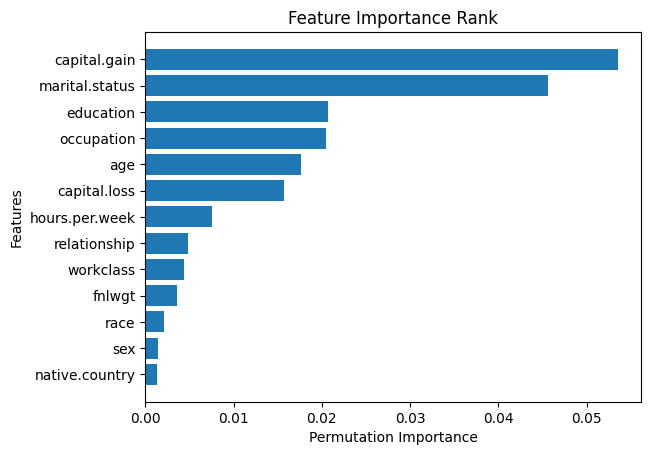

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)

cat_features = preprocessor.transformers_[1][1].get_feature_names_out(cat)
all_feature_names = np.concatenate([num, cat_features])

categorical_importance = {}
for feature, importance in zip(all_feature_names, perm_importance.importances_mean):
    if feature in cat_features:
        original_feature = feature.split('_')[0]
        if original_feature in categorical_importance:
            categorical_importance[original_feature] += importance
        else:
            categorical_importance[original_feature] = importance
    else:
        categorical_importance[feature] = importance

sorted_feature_importance = sorted(categorical_importance.items(), key=lambda x: x[1], reverse=True)

top_n = 15
top_features, top_importances = zip(*sorted_feature_importance[:top_n])

plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance Rank")
plt.show()

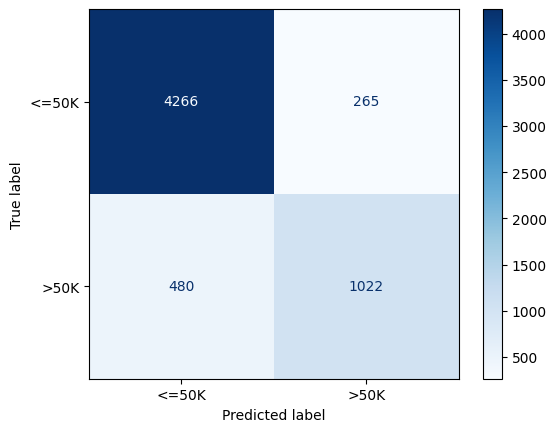

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues')

plt.show()